In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

# Configure rc file
matplotlib.rcParams['figure.dpi'] = 150

# Configure paths
path_data           = "../data"
path_figures        = "../analysis/figures"

filename_part_four  = "Part4_Results.csv"

# Function to read data
def combine_csv_files(directory, prefix="run"):
    # Get a list of files in the directory
    files = os.listdir(directory)
    
    # Filter files that start with the specified prefix and end with '.csv'
    csv_files = [file for file in files if file.startswith(prefix) and file.endswith('.csv')]
    
    # Initialize an empty list to store DataFrames
    dfs = []
    
    # Read each CSV file and append its data to the list
    for file in csv_files:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path,names=["num_darts","size_round","pi_result","total_runtime","num_processors"])
        dfs.append(df)
    
    # Concatenate all DataFrames in the list into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)
    
    return combined_df

In [20]:
# Read data frames
df = combine_csv_files("../data")

# Only select results with runs of size 128
df = df.loc[df['size_round'] == 128]


# Error vs. number of darts

In [111]:
# Calculate Error
df["error"] = np.abs(df["pi_result"] - np.pi)

# Calculate mean and standard deviations
.loc[1].reset_index
df_mean

<bound method DataFrame.reset_index of            size_round  pi_result  total_runtime     error
num_darts                                                
1000            128.0   3.106000       0.022291  0.040395
10000           128.0   3.144467       0.229696  0.011400
100000          128.0   3.142773       2.342635  0.004602
1000000         128.0   3.140998      22.868600  0.001576
10000000        128.0   3.141707     227.976167  0.000352>

In [ ]:
# Plot results 
fig, ax = plt.subplots()

# Group dataframe by processors and number of darts
df_mean = df.groupby(['num_processors','num_darts']).mean()

cmap = plt.get_cmap('viridis')
procc_list = np.unique(df["num_processors"])
for i, processor in enumerate(procc_list):
    # Fit polynomials
    y = np.square(df["error"].loc[idx]) * df["num_darts"].loc[idx]
    x = df["num_darts"].loc[idx]

    a = np.sqrt(np.polyfit(x,y,0))

    # Plot results
    line, = plt.plot(df["num_darts"].loc[idx], df["error"].loc[idx],c=cmap(i/len(procc_list)),linestyle='-')
    line.set_label(processor)

    x = [10**3, 10**9]
    line_fit, = plt.plot(x,a/np.sqrt(x),linestyle=':')
    line_fit.set_color(line.get_color())
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Number of darts")
plt.ylabel("Error")
plt.legend(title="Number of processors")
plt.grid(True)
plt.title("Error vs. Total Number of Darts")
fig.savefig(os.path.join(path_figures,"img01.png"))


# Runtime

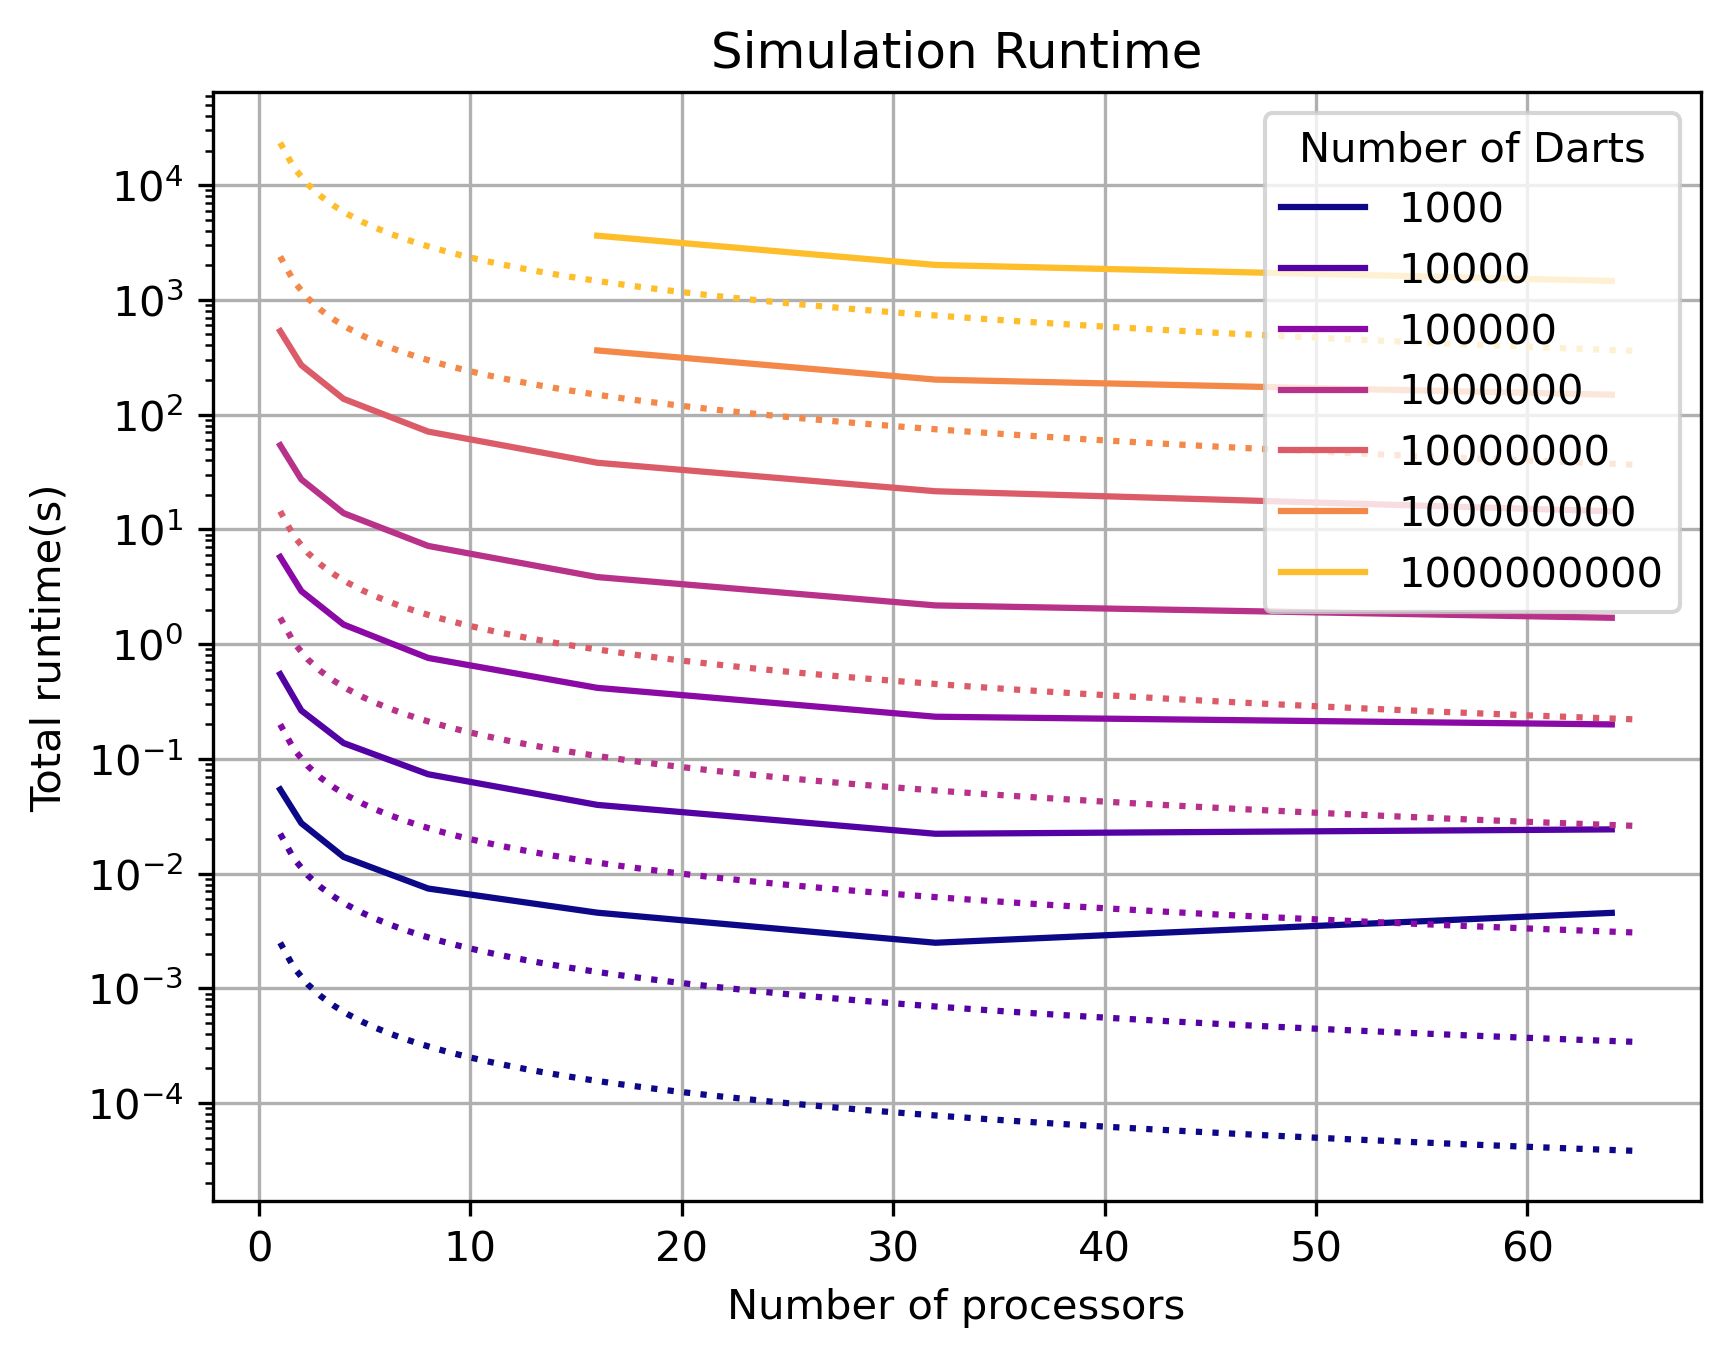

In [13]:
# Format figure
fig, ax = plt.subplots()
cmap = plt.get_cmap('plasma')

# Obtain list of dart counts
counts = np.unique(df["num_darts"])

for i, count in enumerate(counts):
    # Obtain logical index
    idx = (df["num_darts"]==count) & (df["size_round"] == 128)

    # Plot runtime
    x = df["num_processors"].loc[idx]
    y = df["total_runtime"].loc[idx]

    line, = plt.plot(x,y,c=cmap(i/len(counts)))
    line.set_label(count)

    # Calculate baseline runtime
    t = y.min() * x.min()
    x = np.linspace(1,65,100)
    line_ideal, = plt.plot(x,t/x,linestyle=':')
    line_ideal.set_color(line.get_color())

plt.grid(True)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Number of processors')
plt.ylabel('Total runtime(s)')
plt.title("Simulation Runtime")
plt.legend(title="Number of Darts")
fig.savefig(os.path.join(path_figures,"img02.png"))
